# Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
import time
import os

# DataSet Visualisation and Preprocessing

In [4]:
X = pd.read_csv('train.csv')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [7]:
X.head()

Allied_Nations  Diplomatic_Meetings_Set  Percent_Of_Forces_Mobilized  \
0              16                        1                         0.67   
1               8                        1                         0.11   
2               9                        1                         0.49   
3               7                        0                         0.30   
4               8                        1                         0.12   

   Hostile_Nations  Active_Threats  Inactive_Threats  Citizen_Fear_Index  \
0                3             6.0              25.0            0.787812   
1                2            38.0              48.0            0.419236   
2                3            32.0              69.0            0.582232   
3                2            31.0              52.0            0.589574   
4                5            13.0              42.0            0.552863   

   Closest_Threat_Distance(km)  Aircraft_Carriers_Responding  \
0                       324.36                             1   
1                       359.34                             0   
2                       332.84                             1   
3                       358.28                             1   
4                       364.64                             0   

   Troops_Mobilized(thousands)  DEFCON_Level     ID  
0                     862400.0             3   7570  
1                     959200.0             4  12128  
2                     836000.0             3   2181  
3                     924000.0             3   5946  
4                     968000.0             2   9054

In [8]:
X.isna().sum()

Allied_Nations                  0
Diplomatic_Meetings_Set         0
Percent_Of_Forces_Mobilized     0
Hostile_Nations                 0
Active_Threats                  0
Inactive_Threats                0
Citizen_Fear_Index              0
Closest_Threat_Distance(km)     0
Aircraft_Carriers_Responding    0
Troops_Mobilized(thousands)     0
DEFCON_Level                    0
ID                              0
dtype: int64

In [9]:
X.dtypes

Allied_Nations                    int64
Diplomatic_Meetings_Set           int64
Percent_Of_Forces_Mobilized     float64
Hostile_Nations                   int64
Active_Threats                  float64
Inactive_Threats                float64
Citizen_Fear_Index              float64
Closest_Threat_Distance(km)     float64
Aircraft_Carriers_Responding      int64
Troops_Mobilized(thousands)     float64
DEFCON_Level                      int64
ID                                int64
dtype: object

In [10]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

In [11]:
y = X.pop('DEFCON_Level')

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


In [14]:
def scatter_plot(x_data, y_data, x_label, y_label, title):
    plt.scatter(x_data, y_data, s = 15, color = '#539caf', alpha = 0.75)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

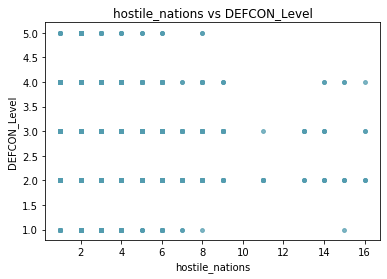

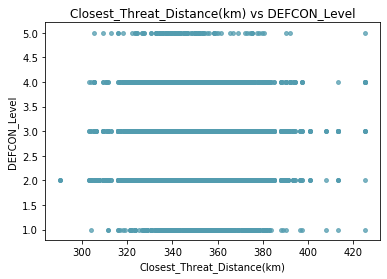

In [15]:
scatter_plot(x_data = X['Hostile_Nations']
            , y_data = y 
            , x_label = 'hostile_nations'
            , y_label = 'DEFCON_Level'
            , title = 'hostile_nations vs DEFCON_Level')
plt.show()
scatter_plot(x_data = X['Closest_Threat_Distance(km)']
            , y_data = y 
            , x_label = 'Closest_Threat_Distance(km)'
            , y_label = 'DEFCON_Level'
            , title = 'Closest_Threat_Distance(km) vs DEFCON_Level')
plt.show()

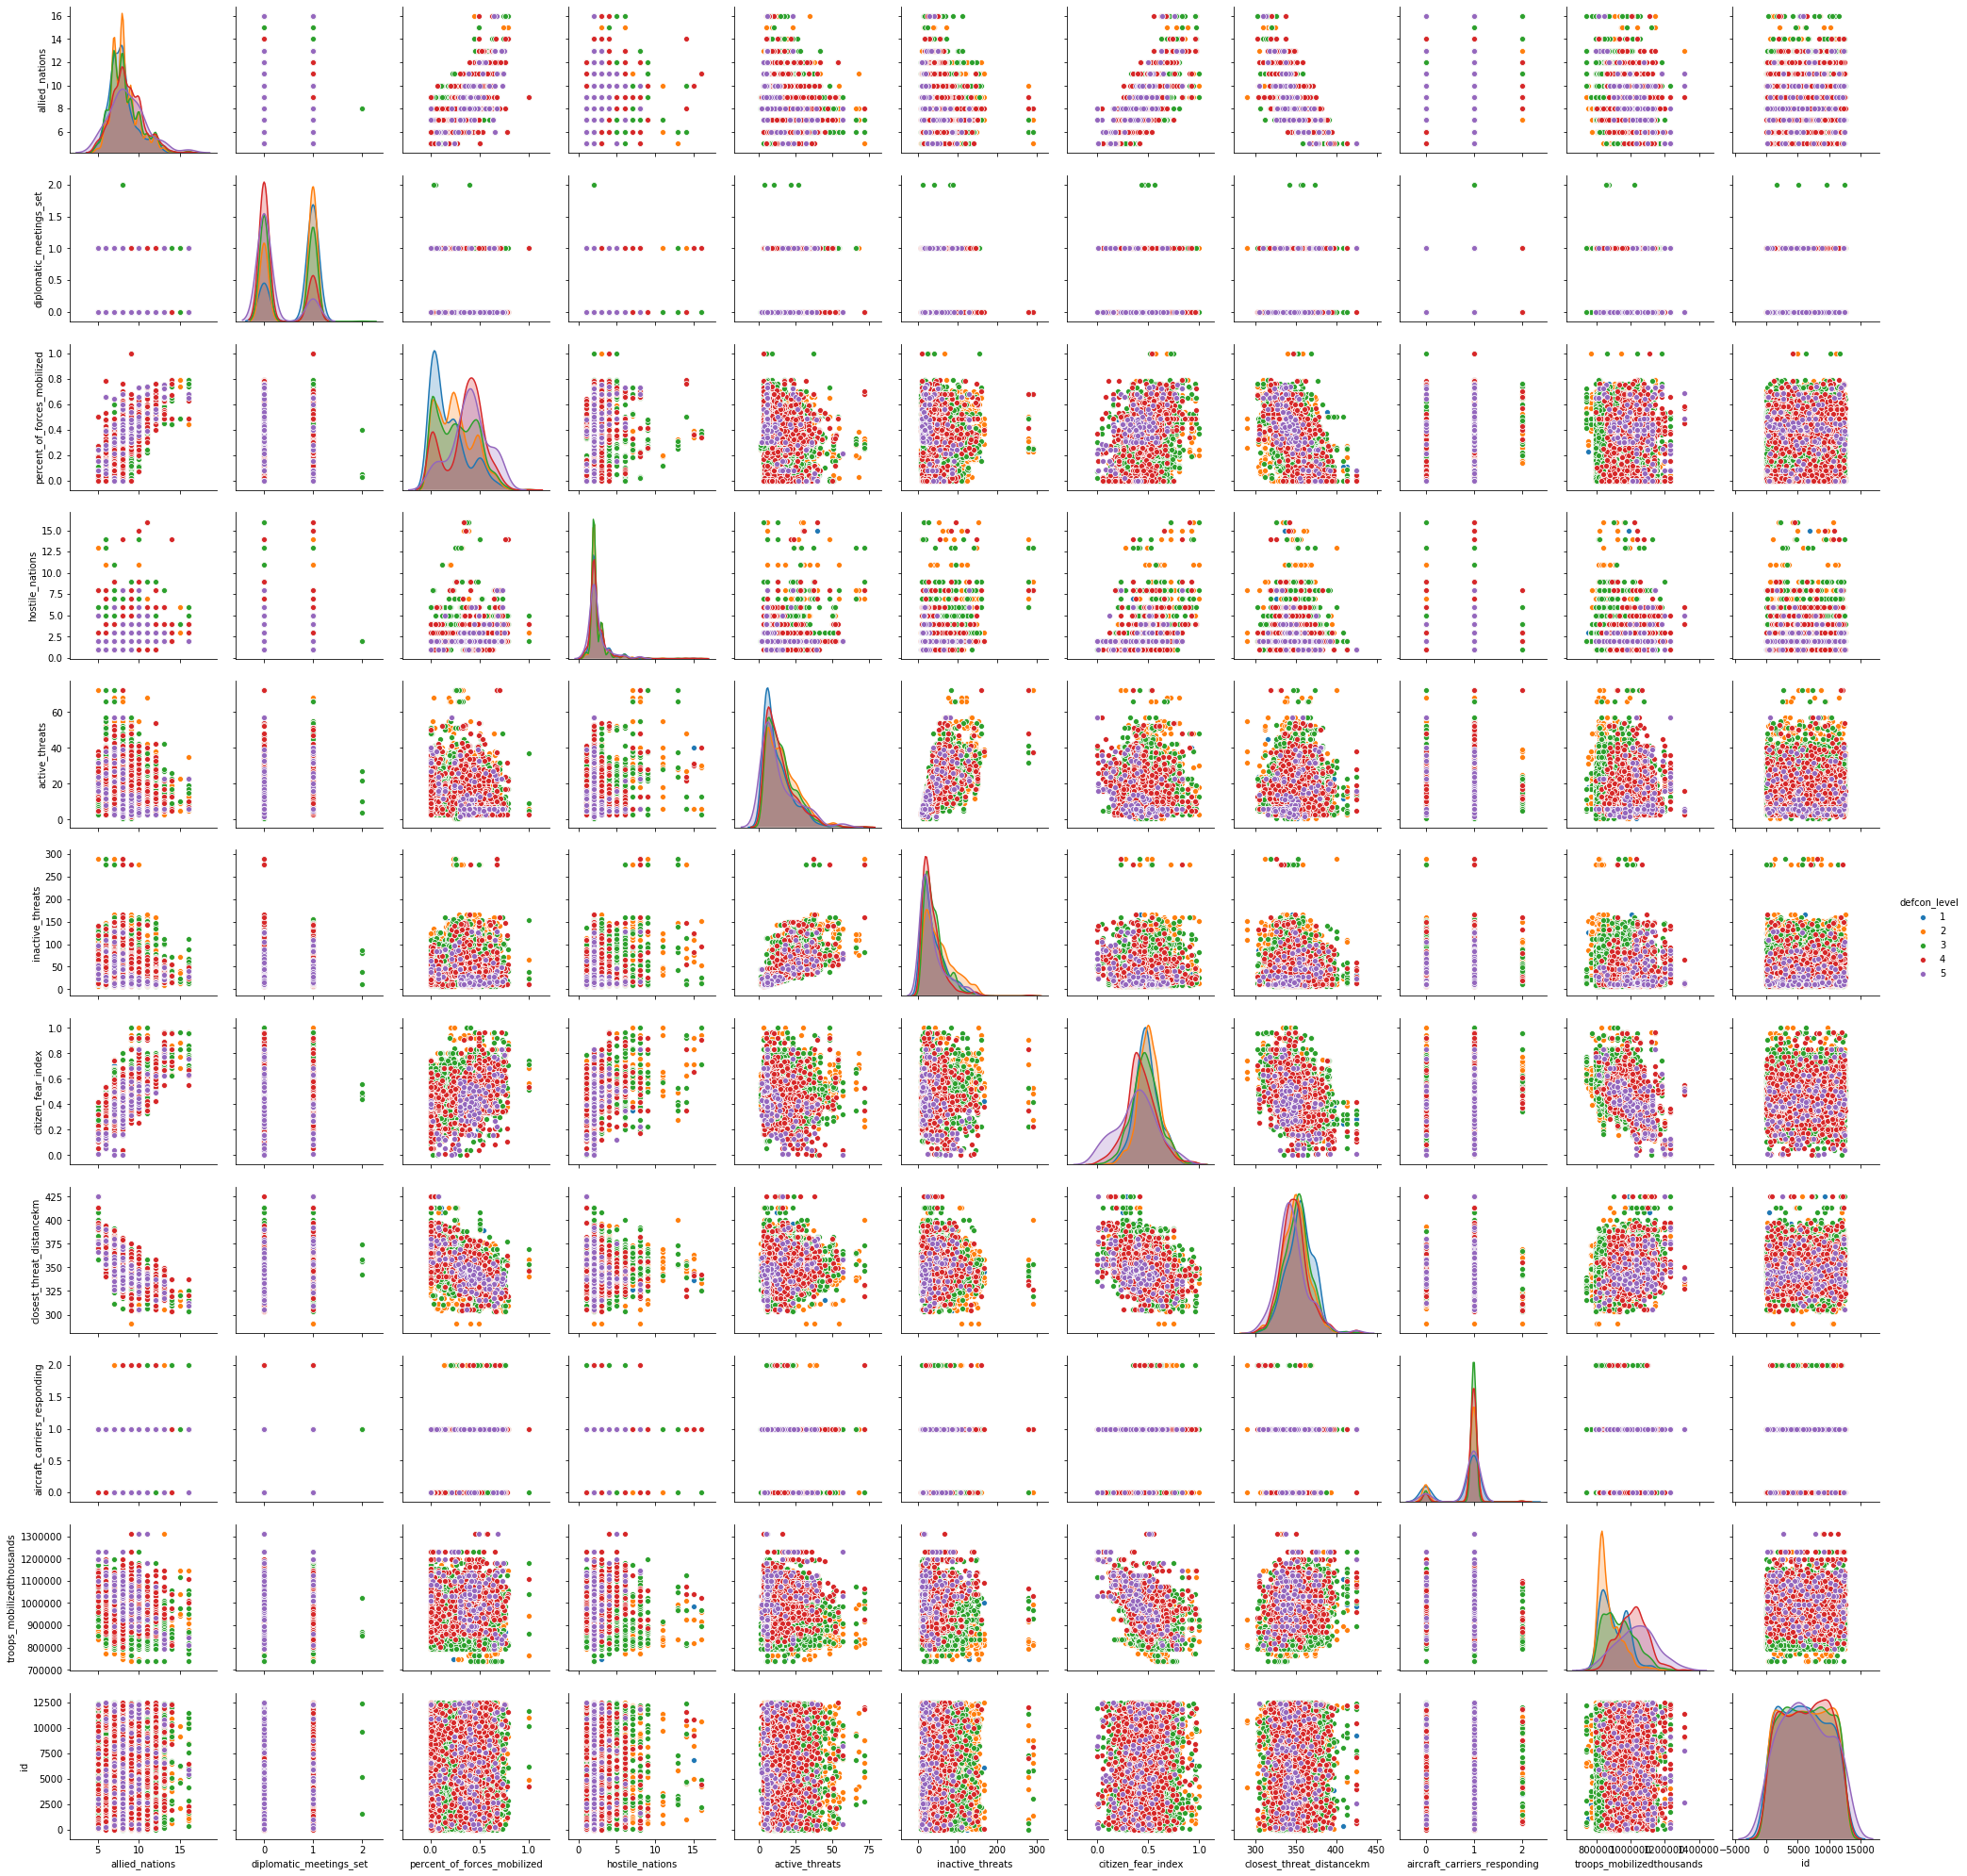

In [14]:
sns.pairplot(df,hue='defcon_level')

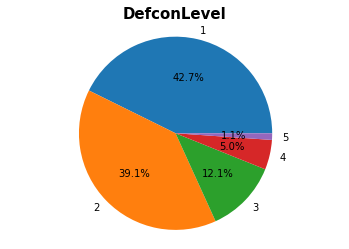

In [15]:
x = df['defcon_level'].value_counts()
x.tolist()
DefconLevel = ['1', '2', '3' , '4' , '5']
piechart = plt.pie(x,  labels = DefconLevel, autopct = '%1.1f%%')
plt.title('DefconLevel', fontsize = 15, fontweight = 'bold')
plt.axis('equal')
plt.show()

In [16]:
df.columns

Index(['allied_nations', 'diplomatic_meetings_set',
       'percent_of_forces_mobilized', 'hostile_nations', 'active_threats',
       'inactive_threats', 'citizen_fear_index', 'closest_threat_distancekm',
       'aircraft_carriers_responding', 'troops_mobilizedthousands',
       'defcon_level', 'id'],
      dtype='object')

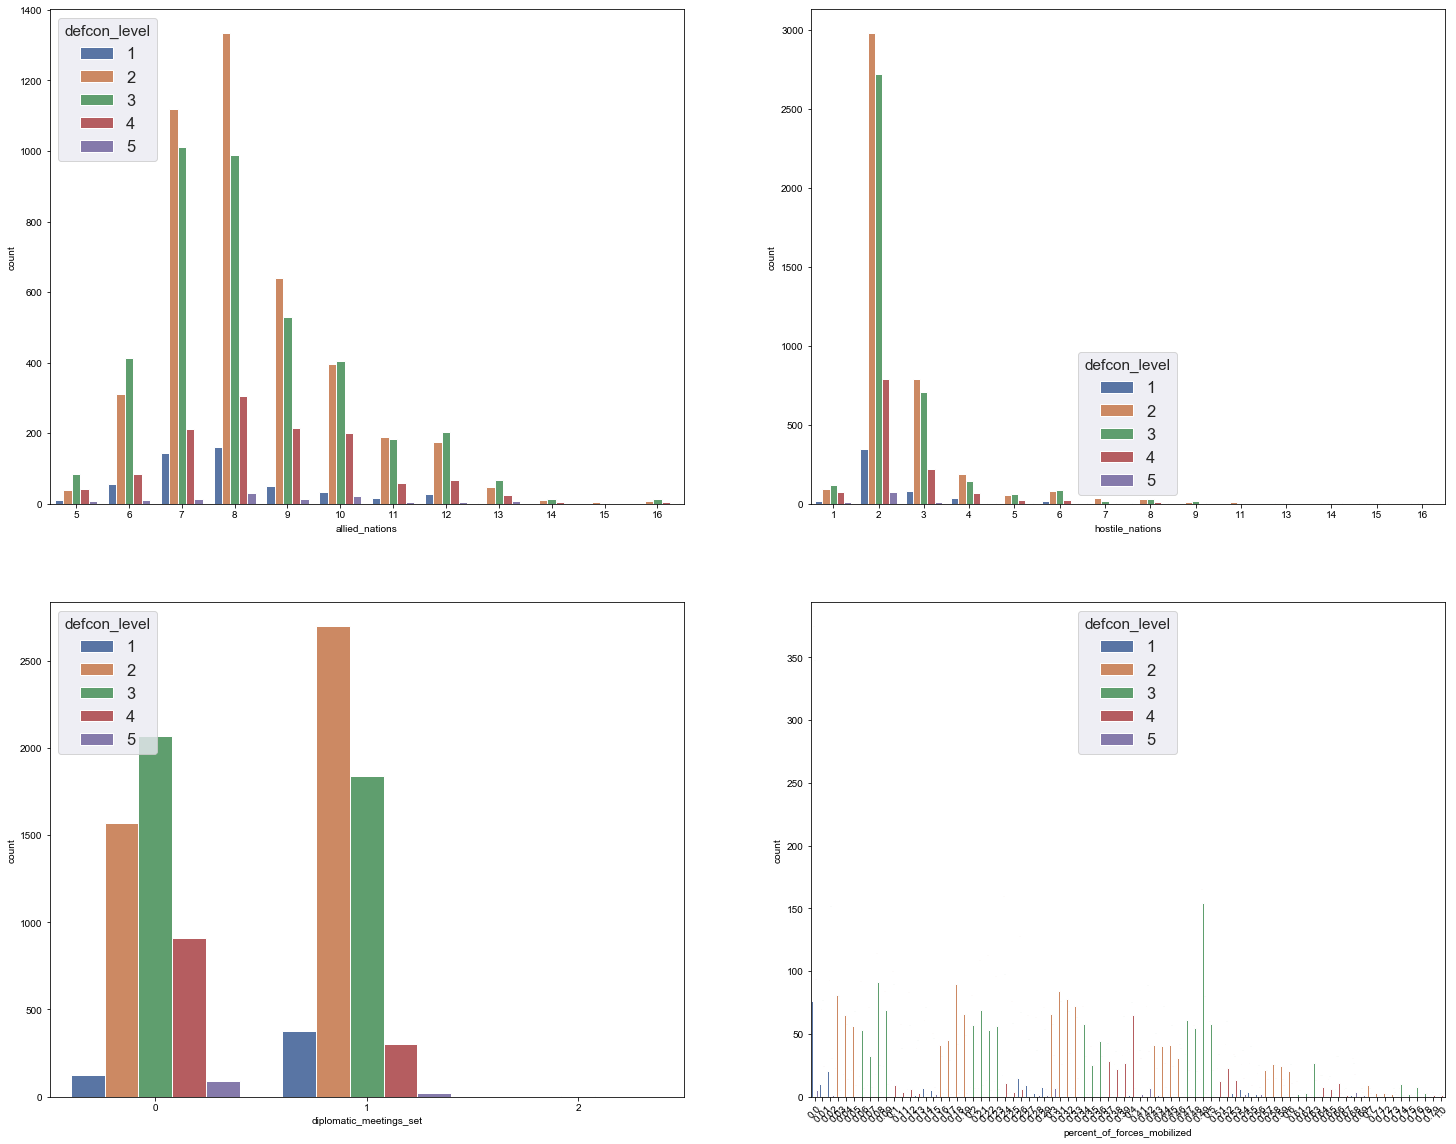

In [17]:
#fig, ((a,b),(c,d),(e,f)) = plt.subplots(2,2,figsize=(25,30))
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(25,20))
plt.xticks(rotation=45)
#plt.set_xticklabels(labels, rotation='vertical')
sns.set(font_scale=1.5)
#sns.countplot(df['id'],hue=df['DEFCON_Level'],ax=a)
sns.countplot(df['allied_nations'],hue=df['defcon_level'],ax=a)
sns.countplot(df['diplomatic_meetings_set'],hue=df['defcon_level'],ax=c)
sns.countplot(df['percent_of_forces_mobilized'],hue=df['defcon_level'],ax=d)
sns.countplot(df['hostile_nations'],hue=df['defcon_level'],ax=b)
#sns.countplot(df['citizen_fear_index'],hue=df['defcon_level'],ax=e)

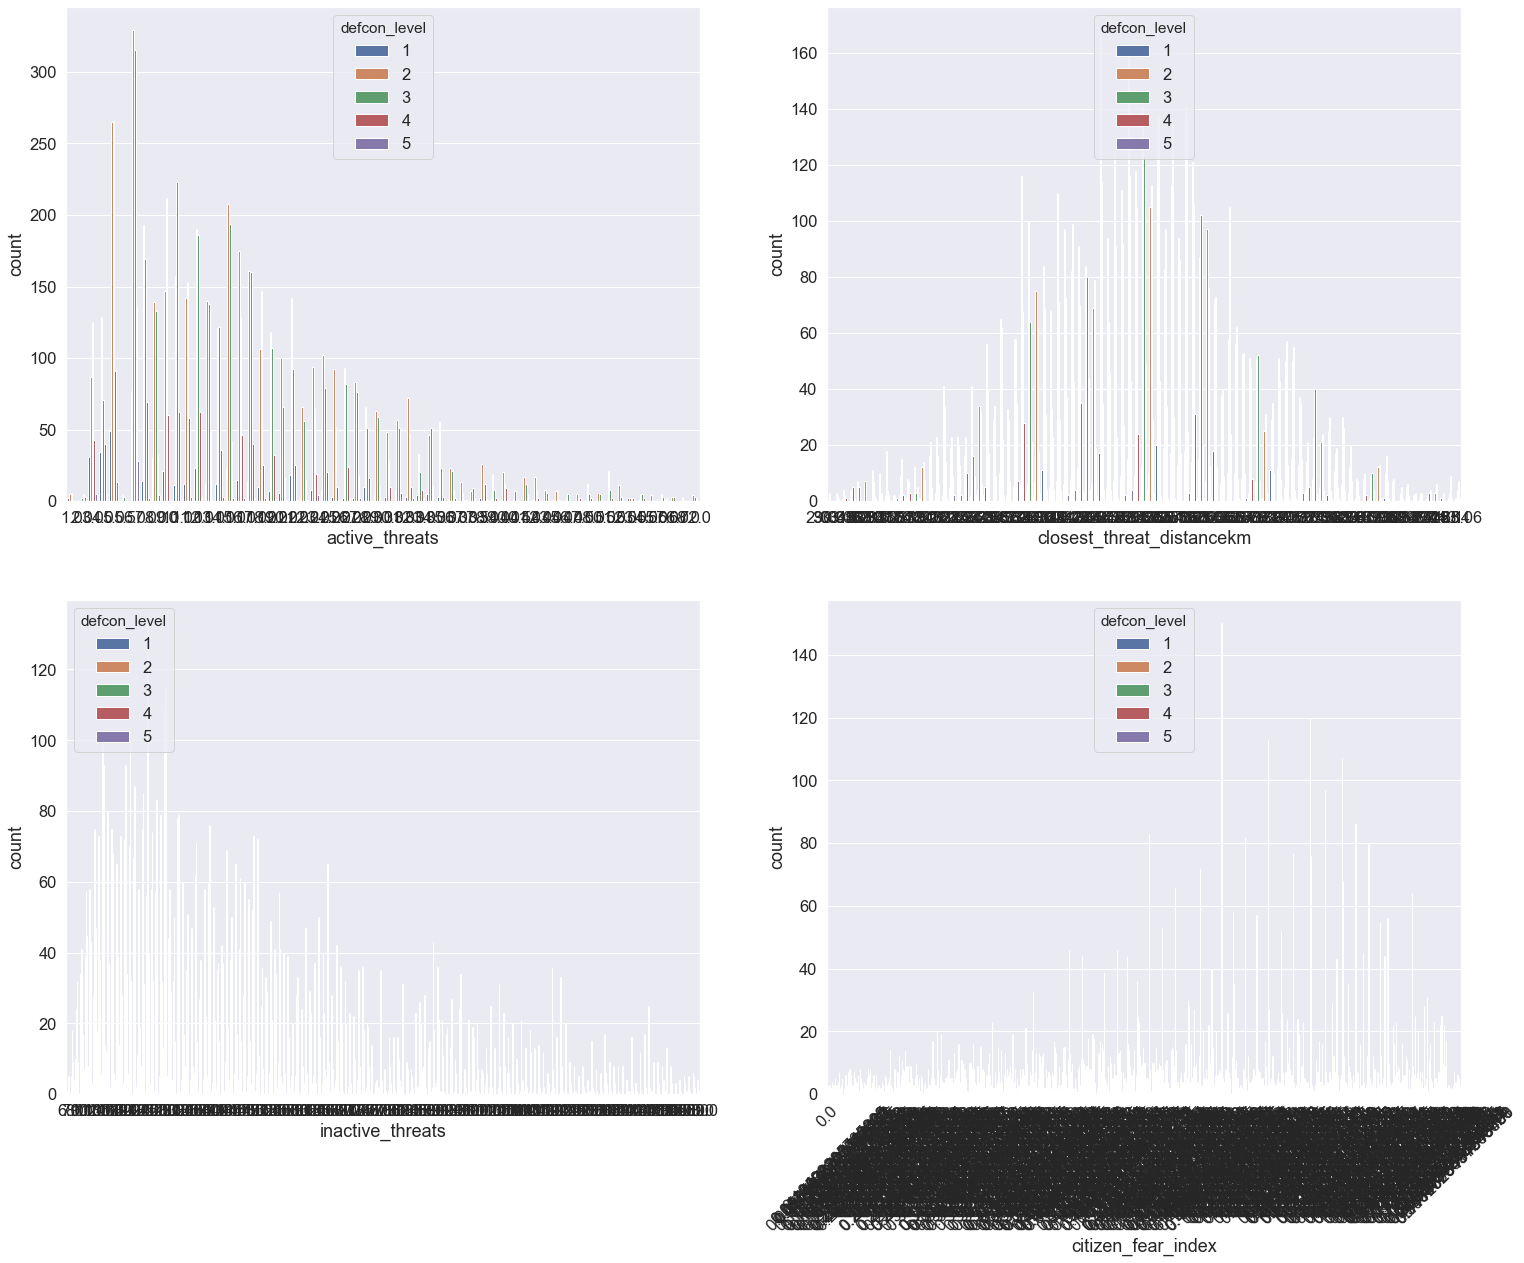

In [18]:
#fig, ((a,b),(c,d),(e,f)) = plt.subplots(2,2,figsize=(25,30))
fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(25,20))
plt.xticks(rotation=45)
#plt.set_xticklabels(labels, rotation='vertical')
sns.set(font_scale=1.5)
#sns.countplot(df['id'],hue=df['DEFCON_Level'],ax=a)
sns.countplot(df['active_threats'],hue=df['defcon_level'],ax=a)
sns.countplot(df['inactive_threats'],hue=df['defcon_level'],ax=c)
sns.countplot(df['citizen_fear_index'],hue=df['defcon_level'],ax=d)
sns.countplot(df['closest_threat_distancekm'],hue=df['defcon_level'],ax=b)
#sns.countplot(df['citizen_fear_index'],hue=df['defcon_level'],ax=e)

In [19]:
# fig, ((a,b),(c,d)) = plt.subplots(2,2,figsize=(25,20))
# plt.xticks(rotation=45)
# sns.set(font_scale=1.5)
# sns.countplot(df['aircraft_carriers_responding'],hue=df['defcon_level'],ax=a)
# sns.countplot(df['troops_mobilizedthousands'],hue=df['defcon_level'],ax=c)
# sns.countplot(df['id'],hue=df['defcon_level'],ax=d)
# sns.countplot(df['defcon_level'],hue=df['defcon_level'],ax=b)

### Can remove this column

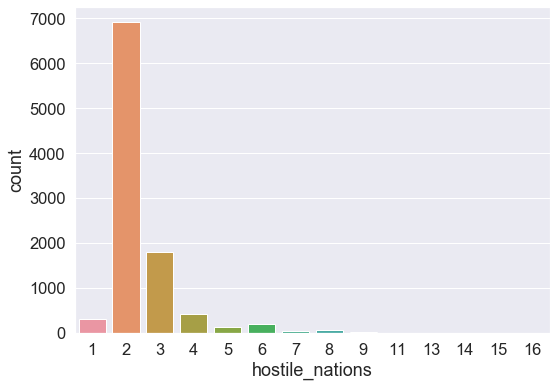

In [20]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.hostile_nations,label="Hostile_Nations")

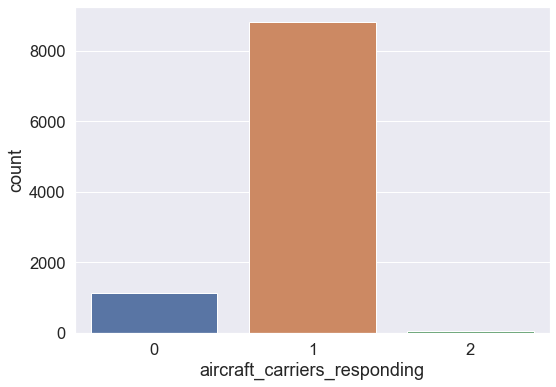

In [21]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.aircraft_carriers_responding,label="aircraft_carriers_responding")

### Below graph shows highly biased data

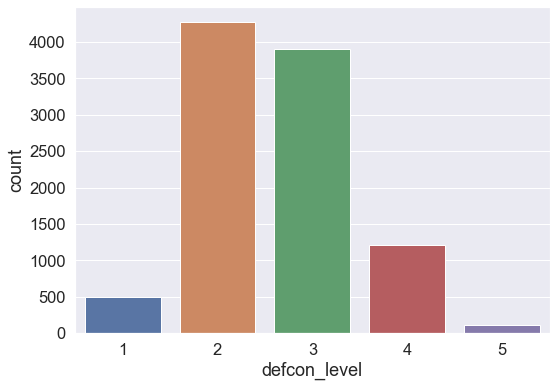

In [22]:
a4_dims = (8.5, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(df.defcon_level,label="defcon_level")

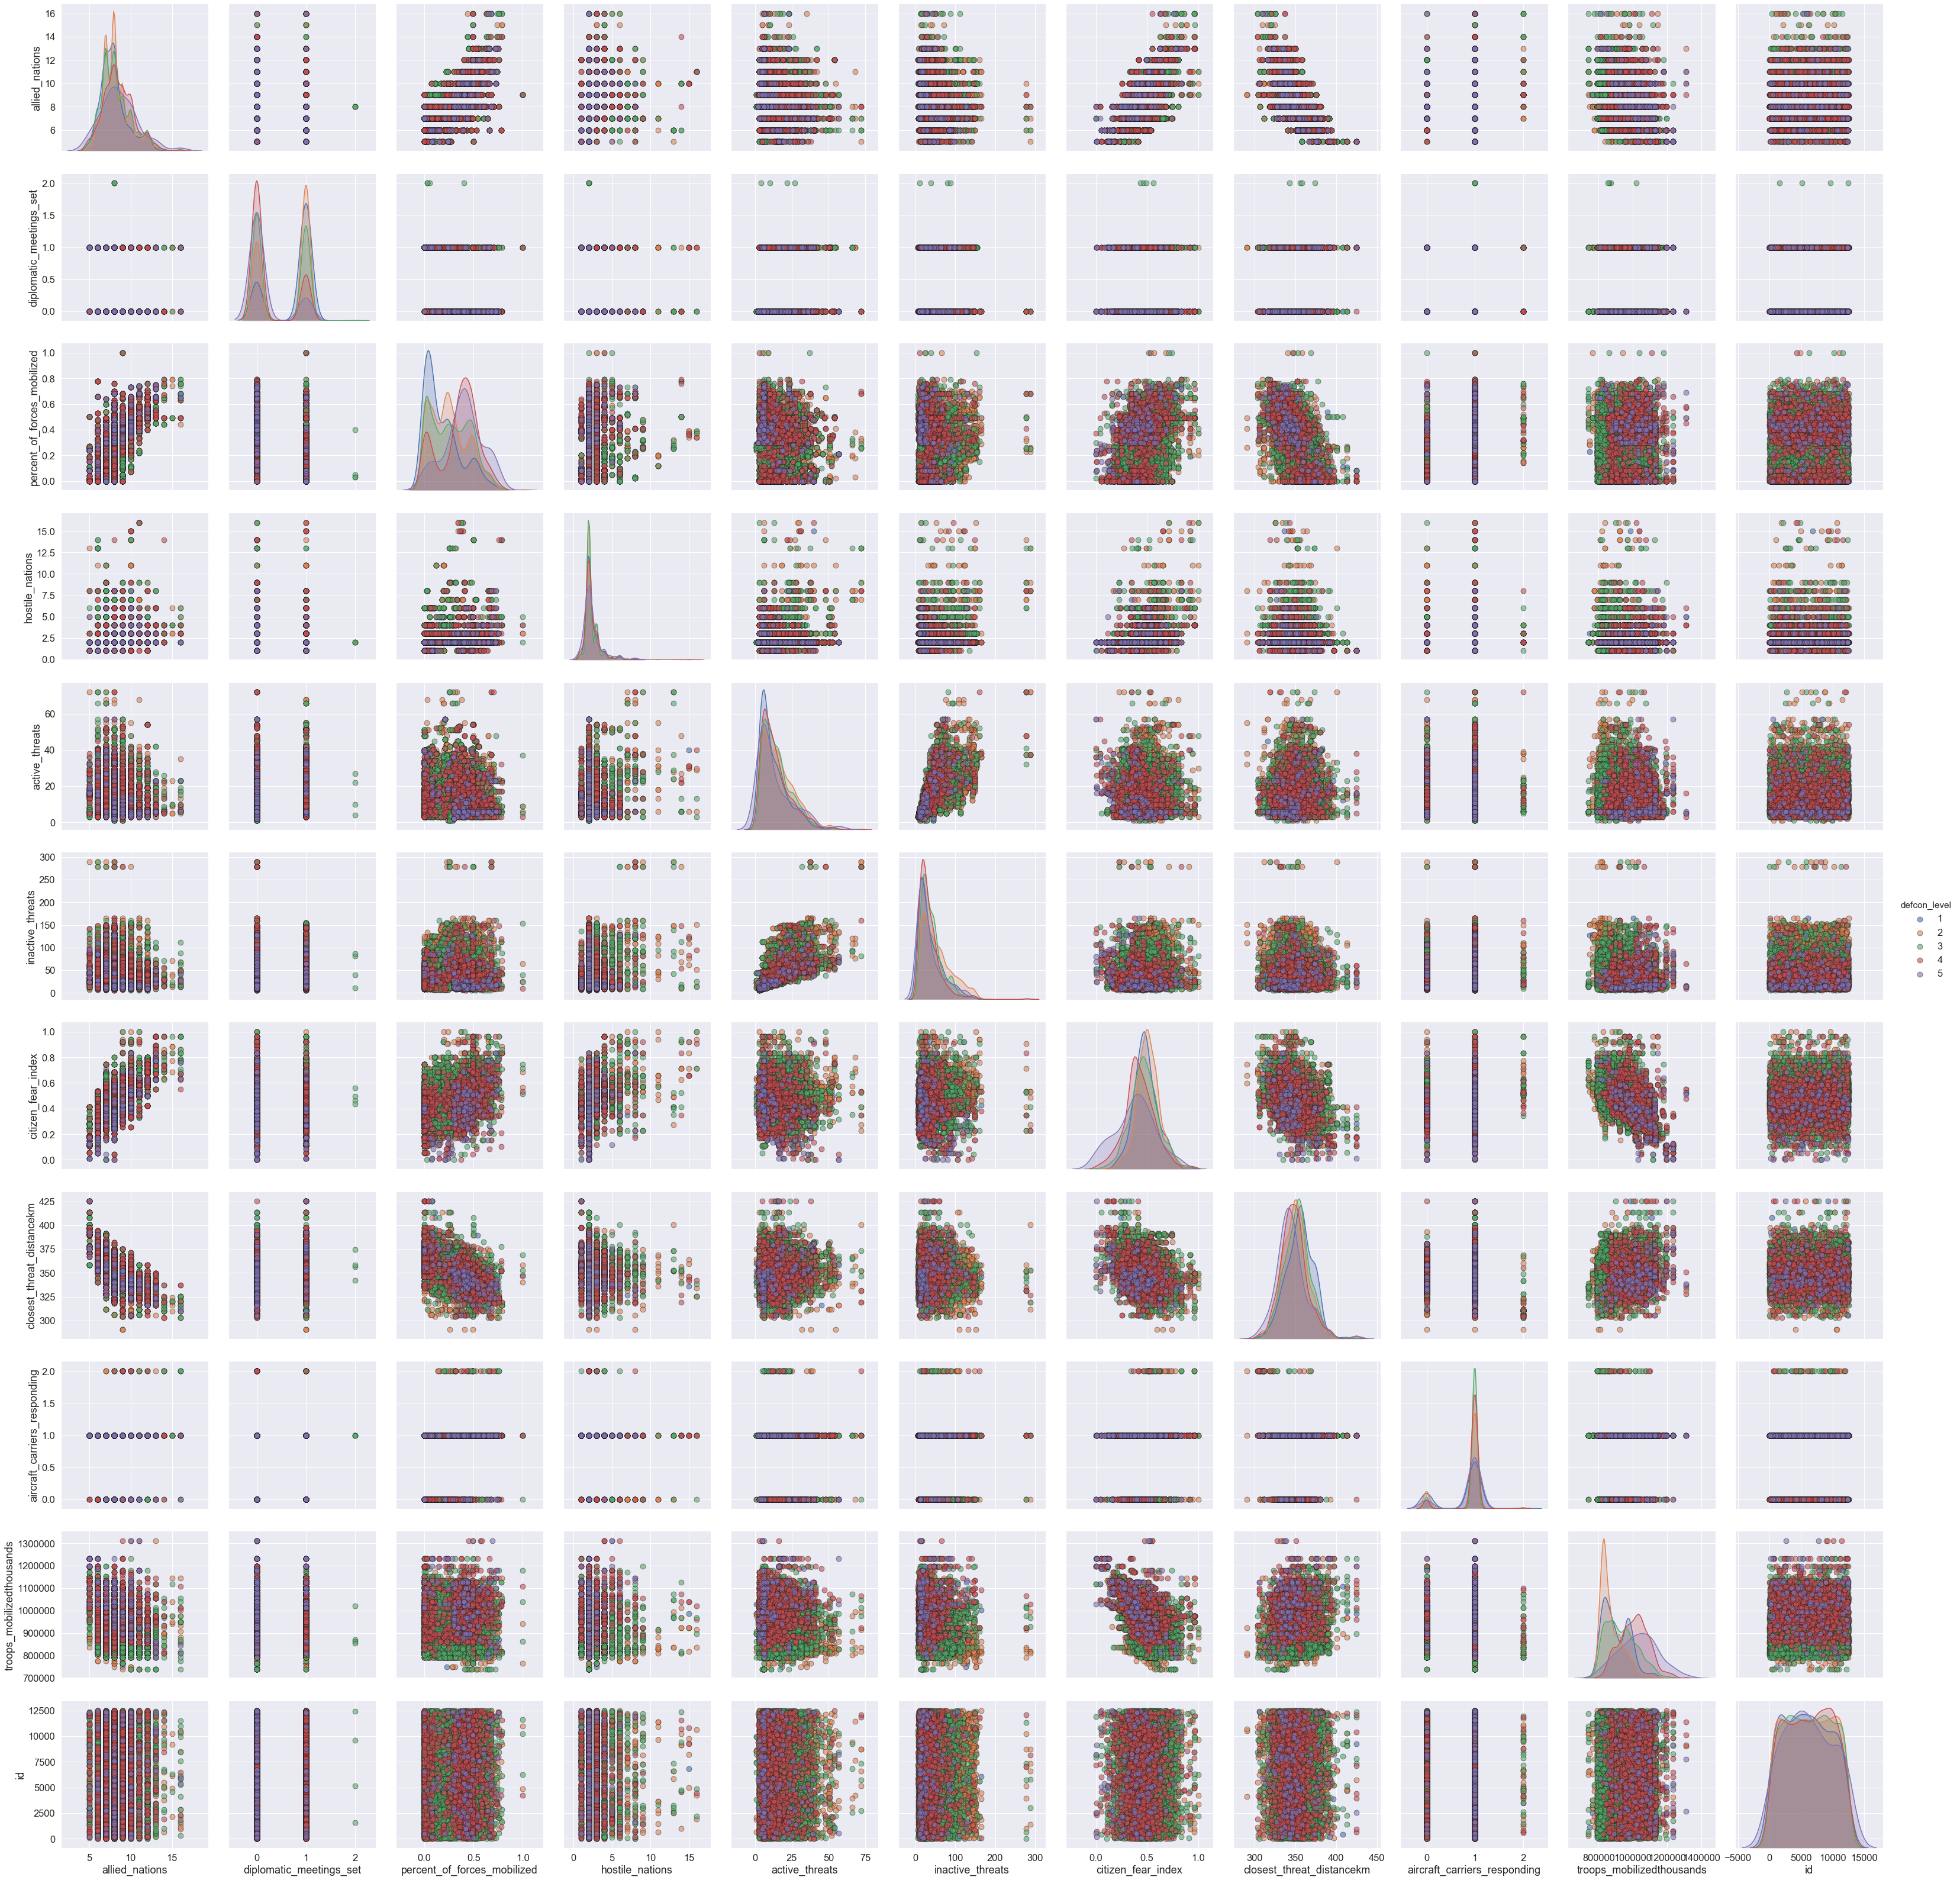

In [23]:
sns.pairplot(df, hue = 'defcon_level', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

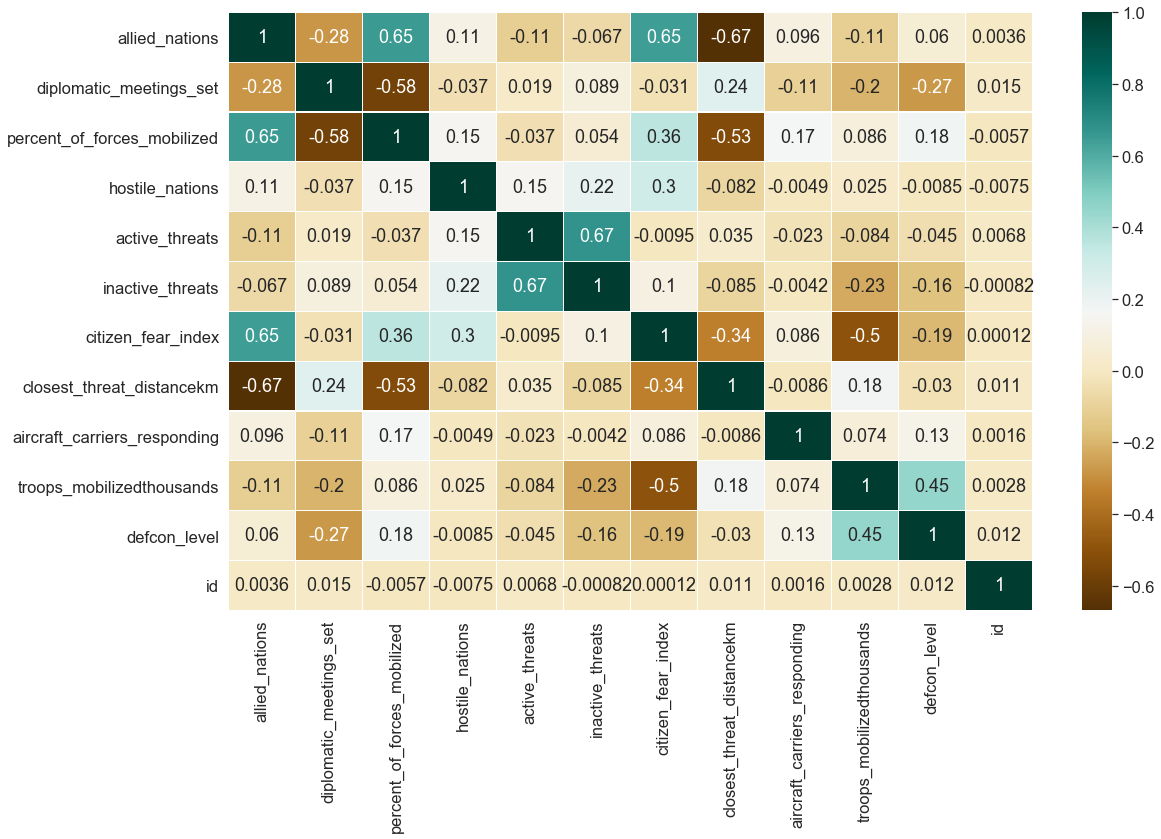

In [24]:
f,ax = plt.subplots(figsize=(18, 11))
sns.heatmap(df.corr(), cmap = "BrBG",annot=True, linewidths=.1,ax=ax)
plt.show()

In [16]:
df.drop(columns=['hostile_nations','aircraft_carriers_responding'],axis=1,inplace=True)

In [17]:
df.head()

allied_nations  diplomatic_meetings_set  percent_of_forces_mobilized  \
0              16                        1                         0.67   
1               8                        1                         0.11   
2               9                        1                         0.49   
3               7                        0                         0.30   
4               8                        1                         0.12   

   active_threats  inactive_threats  citizen_fear_index  \
0             6.0              25.0            0.787812   
1            38.0              48.0            0.419236   
2            32.0              69.0            0.582232   
3            31.0              52.0            0.589574   
4            13.0              42.0            0.552863   

   closest_threat_distancekm  troops_mobilizedthousands  defcon_level     id  
0                     324.36                   862400.0             3   7570  
1                     359.34                   959200.0             4  12128  
2                     332.84                   836000.0             3   2181  
3                     358.28                   924000.0             3   5946  
4                     364.64                   968000.0             2   9054

In [18]:
XX_train, XX_test, yy_train, yy_test = train_test_split(df.drop('defcon_level',axis=1),df['defcon_level'], test_size=0.30,
                                                        random_state=101)

In [19]:
print(XX_train.shape)
print(XX_test.shape)
print(yy_train.shape)
print(yy_test.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


In [20]:
XX_train.head()

allied_nations  diplomatic_meetings_set  percent_of_forces_mobilized  \
803                8                        0                         0.06   
1387               9                        1                         0.11   
921                7                        0                         0.30   
5917               7                        0                         0.30   
9610              10                        1                         0.07   

      active_threats  inactive_threats  citizen_fear_index  \
803              6.0              11.0            0.450073   
1387             4.0              14.0            0.662996   
921              6.0              12.0            0.254772   
5917            31.0              51.0            0.483847   
9610             6.0              19.0            0.530837   

      closest_threat_distancekm  troops_mobilizedthousands    id  
803                      358.28                   897600.0  2459  
1387                     351.92                   840400.0  7438  
921                      360.40                  1012000.0  2963  
5917                     368.88                   897600.0  9734  
9610                     336.02                   827200.0  7331

In [21]:
yy_train.head()

803     3
1387    2
921     4
5917    3
9610    1
Name: defcon_level, dtype: int64

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
select_feature = SelectKBest(chi2, k=5).fit(XX_train,yy_train)

In [25]:
print('Score list:', select_feature.scores_)
print('Feature list:', XX_train.columns)

Score list: [7.85151657e+00 2.47884984e+02 3.52709361e+01 6.75249494e+02
 9.01012143e+03 1.23598565e+01 5.71877258e+01 1.54786031e+07
 8.80608273e+03]
Feature list: Index(['allied_nations', 'diplomatic_meetings_set',
       'percent_of_forces_mobilized', 'active_threats', 'inactive_threats',
       'citizen_fear_index', 'closest_threat_distancekm',
       'troops_mobilizedthousands', 'id'],
      dtype='object')


In [27]:
print(XX_train.shape[1])

9


In [26]:
from sklearn.ensemble import RandomForestClassifier

1. feature 7 (0.183447)
2. feature 4 (0.145957)
3. feature 5 (0.136203)
4. feature 8 (0.131792)
5. feature 6 (0.120057)
6. feature 2 (0.120004)
7. feature 3 (0.097556)
8. feature 0 (0.046011)
9. feature 1 (0.018973)


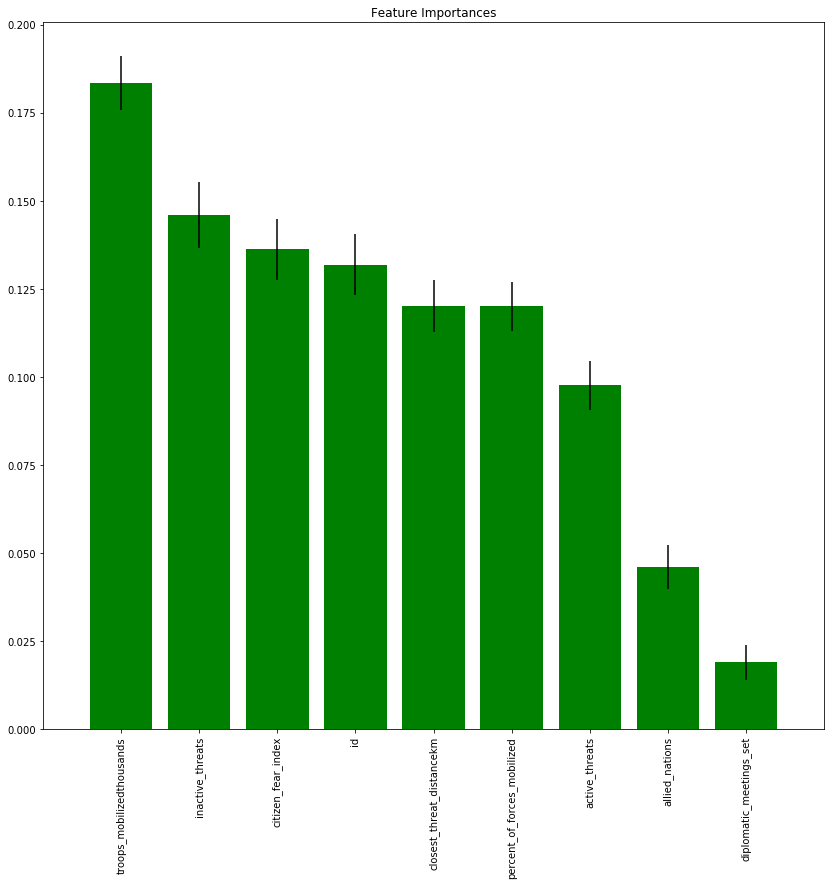

In [28]:
rcf = RandomForestClassifier()      
rcf = rcf.fit(XX_train,yy_train)
importances = rcf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rcf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

for f in range(XX_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature Importances")
plt.bar(range(XX_train.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(XX_train.shape[1]), XX_train.columns[indices], rotation=90)
plt.xlim([-1, XX_train.shape[1]])
plt.show()

In [29]:
XX_train.drop(columns=['diplomatic_meetings_set'],inplace=True)
XX_test.drop(columns=['diplomatic_meetings_set'],inplace=True)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier() 

In [34]:
forest_scores = cross_val_score(forest, XX_train, yy_train, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.5538317927427195


In [35]:
print(forest_scores)

[0.56410256 0.58404558 0.55840456 0.52706553 0.55349501 0.58
 0.55364807 0.56303725 0.52080344 0.53371593]


In [36]:
forest_cv_mean = np.mean(forest_scores)
forest_cv_variance = np.var(forest_scores)

print('forest Mean score : ', forest_cv_mean)
print('forest Score variance : ', forest_cv_variance)

forest Mean score :  0.5538317927427195
forest Score variance :  0.0004020887757782518


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gb = GradientBoostingClassifier()

In [40]:
start_gb = time.time()

gb_scores = cross_val_score(gb, XX_train, yy_train, cv=10, scoring='accuracy')
print('The accuracy of the Gradient Boosting classifier with 10 fold cross-validation is ' + str(gb_scores.mean()))

end_gb =time.time()
gb_time = (end_gb-start_gb)/60
print('The time taken for the classifier for 10 fold cross validation is ' + str(gb_time))

The accuracy of the Gradient Boosting classifier with 10 fold cross-validation is 0.5671352620337625
The time taken for the classifier for 10 fold cross validation is 0.542066486676534


In [41]:
print(gb_scores)

[0.57692308 0.56837607 0.57549858 0.58262108 0.53922967 0.56571429
 0.57224607 0.55157593 0.56384505 0.57532281]


In [42]:
gb_cv_mean = np.mean(gb_scores)
gb_cv_variance = np.var(gb_scores)

print('gb Mean score : ', gb_cv_mean)
print('gb Score variance : ', gb_cv_variance)

gb Mean score :  0.5671352620337625
gb Score variance :  0.00015339122659492987


## Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
start_time = time.time()

gb = GradientBoostingClassifier()

param_grid = [
              {'n_estimators': [50,75,100,125,150]}]


grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(XX_train, yy_train)

print("Best n_estimator found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best n_estimator found for GradientBoosting Classifier:
{'n_estimators': 100}

Scores on training set:
0.563 (+/-0.032) for {'n_estimators': 50}
0.566 (+/-0.024) for {'n_estimators': 75}
0.567 (+/-0.025) for {'n_estimators': 100}
0.566 (+/-0.024) for {'n_estimators': 125}
0.564 (+/-0.025) for {'n_estimators': 150}

The hyperparameter tuning took:  166.66392159461975 seconds


### Max Depth tuning

In [46]:
start_time = time.time()

gb = GradientBoostingClassifier()

param_grid = [{'max_depth': [3,5,7,9,11,15]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(XX_train, yy_train)

print("Best max_depth found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best max_depth found for GradientBoosting Classifier:
{'max_depth': 11}

Scores on training set:
0.567 (+/-0.025) for {'max_depth': 3}
0.575 (+/-0.031) for {'max_depth': 5}
0.581 (+/-0.029) for {'max_depth': 7}
0.578 (+/-0.031) for {'max_depth': 9}
0.584 (+/-0.028) for {'max_depth': 11}
0.581 (+/-0.021) for {'max_depth': 15}

The hyperparameter tuning took:  1344.6434757709503 seconds


### Max features tuning

In [48]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators= 100, max_depth = 11,learning_rate = 0.1)

param_grid = [{'max_features': [3,5,7]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(XX_train, yy_train)

print("Best max_features found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best max_features found for GradientBoosting Classifier:
{'max_features': 5}

Scores on training set:
0.582 (+/-0.026) for {'max_features': 3}
0.587 (+/-0.033) for {'max_features': 5}
0.587 (+/-0.033) for {'max_features': 7}

The hyperparameter tuning took:  900.4566798210144 seconds


### Min sample split tuning

In [49]:
start_time = time.time()

gb = GradientBoostingClassifier(n_estimators= 100, max_depth = 11,learning_rate = 0.1,max_features=5)

param_grid = [{'min_samples_split': [500,1000,1250,1500,2000]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(XX_train, yy_train)

print("Best min_samples_split found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("The hyperparameter tuning took:  %s seconds" % (time.time() - start_time))

Best min_samples_split found for GradientBoosting Classifier:
{'min_samples_split': 500}

Scores on training set:
0.577 (+/-0.023) for {'min_samples_split': 500}
0.570 (+/-0.021) for {'min_samples_split': 1000}
0.568 (+/-0.022) for {'min_samples_split': 1250}
0.569 (+/-0.027) for {'min_samples_split': 1500}
0.565 (+/-0.024) for {'min_samples_split': 2000}

The hyperparameter tuning took:  243.39164209365845 seconds


In [ ]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
logmodel.fit(XX_train, yy_train)

In [ ]:
#predictions
Predictions = logmodel.predict(XX_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yy_test,Predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yy_test, Predictions))

# Testing Model

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)

model = linear_model.LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)

lennn = len(y_poly_pred)
print(lennn)
for i in range(lennn):
    y_poly_pred[i] = int(y_poly_pred[i])
    
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
lenn = len(y_pred)
print(lenn)

In [ ]:
for i in range(lenn):
    y_pred[i] = int(y_pred[i])

In [ ]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test,y_pred))

# Predictions

In [ ]:
df2 = pd.read_csv("test.csv")

In [ ]:
df2.head()

In [ ]:
X_TEST = df2

In [ ]:
Y_pred = reg.predict(X_TEST)

In [ ]:
for i in range(len(Y_pred)):
    Y_pred[i] = int(Y_pred[i])

In [ ]:
submission = pd.DataFrame({ 'ID': X_TEST.ID.values, 'DEFCON_Level': Y_pred })
submission.to_csv("s00.csv", index=False)